Logan Williamson
====

###ChE 116 - Numerical Methods and Statistics

###Dr. Andrew White

###Project Type I - Analysis of Trends in Automobile Fuel Efficiency and Annual Fuel Cost Data Since 1984

***

In [1]:
#This cell imports all the packages that will be used
import pandas as pd
import numpy as np
import seaborn
%matplotlib inline
import matplotlib.pyplot as plt
import math
import scipy.optimize 
import scipy.stats

In [2]:
#Loads the data using Pandas module
vehicles = pd.read_excel('vehicle_data.xlsx')

***

Introduction
====

The cost of fuel is a topic of conversation consistently heard throughout the United States. It is a commodity that is essential to transportation. The objective of this project is to examine data concerning annual fuel cost and average fuel mileage from 1984-2015. Using state-of-the-art statistical tools, the population mean fuel cost and fuel mileage of cars made in various years will be calculated and trends examined. Further, the relationship between the variables will be considered, with the ultimate goal being a regression that will fit a line whose equation will be used to predict annual fuel cost based on a given average fuel mileage.

***

Overall Analysis of Fuel Mileage Data
====

Using a histogram, the average fuel mileage data of the sampled cars will be visually examined. This is crucial because it will help decide what type of probability distribution the data follows. 

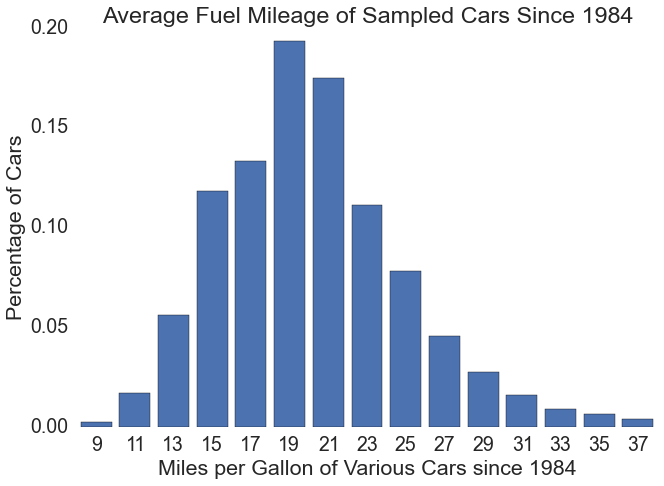

In [7]:
my_bins = np.arange(8,40,2) #Creates a range of bins for the histogram
hist, bins = np.histogram(vehicles.ix[:,4], bins = my_bins) #Creates the histogram using a numpy function
#print bins #Checks the created bins to make sure they are what is desired
bin_mids = (bins[1:] + bins[:-1]) / 2 #labels the bins by taking the middle point of the left and right ends
#print bin_mids #Checks the new labels on the bins
seaborn.barplot(bin_mids, hist / float(len(vehicles.ix[:,4]))) #Formats the histogram using the seaborn package
plt.xlabel('Miles per Gallon of Various Cars since 1984') 
plt.ylabel('Percentage of Cars')
plt.title('Average Fuel Mileage of Sampled Cars Since 1984')
seaborn.set_context('talk',font_scale = 1.5)
plt.show() #Displays the histogram

In [5]:
print 'The sample mean of average fuel mileage for cars made since 1984 is {:.2f} miles per gallon.'.format(np.mean(vehicles['Miles/gal']))

The sample mean of average fuel mileage for cars made since 1984 is 19.94 miles per gallon.


In [6]:
print 'The sample standard deviaton is {:.2f} miles per gallon.' .format(math.sqrt(np.var(vehicles['Miles/gal'], ddof = 1)))

The sample standard deviaton is 6.06 miles per gallon.


From the histogram it can be seen that the fuel mileage data is normally distributed, with a slight positive skew (to the right). This assumption of normality will be used for defining functions when the data is resampled. The function for a normal distribution is defined below.

$$P(\mu,\sigma) = \frac{1}{\sqrt{2\sigma}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}$$

with $\mu = mean$ and $\sigma = standard\space{deviation}$

***

Using Maximum Likelihood Estimation, Bootstrap Resampling, and Confidence Intervals to Examine Changes in Fuel Mileage Between 1990 and 2010
====

Wouldn't it be interesting to see how fuel mileage in cars has changed over the last 30 years? Using Python we can easily do this! This is done using bootstrap resampling, which is a non-parametric method of sampling, meaning it does not assume the data comes from any distribution. From the sampled data, confidence intervals can be constructed for the uncertainty in the mean. Since the data was observed to be normally distributed in the histogram above, the function that will be maximized using MLE will be the log-likelihood normal function: $$\mathcal{l}(\mu, \sigma; X) = -\frac{N}{2}\ln 2\pi\sigma^2 - \sum_i^N \frac{(x_i - \mu)^2}{2\sigma^2}$$

**Average Fuel Milage in 1990:**

In [8]:
def norm_ll_1990(mu, sigma, data): #Defines a log-likelihood function using a normal distribution
    ll = -len(data) / 2. * np.log(2 * math.pi * sigma**2) - np.sum( (data - mu)**2 / (2 * sigma**2) )
    return ll

N = 10000 #Numbers of times the data will be resampled
results1990 = np.empty( (N, 2) )
for i in range(N): #For loop used to actually do the sampling
    sample_data = np.random.choice(vehicles.ix[8406:9483,4], size=len(vehicles.ix[8406:9483,4]), replace=True) #Creates a synthetic data set
    result = scipy.optimize.minimize(lambda x: -norm_ll_1990(x[0], x[1], sample_data), x0=[20.,7.], bounds = [(0.001, 50),(0.001,20)]) #Minimizes the function
    results1990[i, :] = result.x #Appends the list with the synthetic data that has been minimized with respect to the function

range_1990 = np.percentile(results1990[:,0], [2.5, 97.5]) #Calculates a 95% confidence interval using percentiling 
mean_1990 = (range_1990[0] + range_1990[1]) / 2
interval_1990 = range_1990[1] - mean_1990
print 'With a 95% confidence interval, the average fuel mileage of cars made in 1990:',mean_1990,'plus or minus',interval_1990

With a 95% confidence interval, the average fuel mileage of cars made in 1990: 17.6753123564 plus or minus 0.27552260255


**Average Fuel Milage in 2000:**

In [9]:
def norm_ll_2000(mu, sigma, data):
    ll = -len(data) / 2. * np.log(2 * math.pi * sigma**2) - np.sum( (data - mu)**2 / (2 * sigma**2) )
    return ll

N = 10000 
results2000 = np.empty( (N, 2) )
for i in range(N):
    sample_data = np.random.choice(vehicles.ix[17978:18817,4], size=len(vehicles.ix[17978:18817,4]), replace=True)
    result = scipy.optimize.minimize(lambda x: -norm_ll_2000(x[0], x[1], sample_data), x0=[20.,7.], bounds = [(0.001, 50),(0.001,20)])
    results2000[i, :] = result.x

range_2000 = np.percentile(results2000[:,0], [2.5, 97.5])
mean_2000 = (range_2000[0] + range_2000[1]) / 2
interval_2000 = range_2000[1] - mean_2000
print 'With a 95% confidence interval, the average fuel mileage of cars made in 2000:',mean_2000,'plus or minus',interval_2000

With a 95% confidence interval, the average fuel mileage of cars made in 2000: 20.83511873 plus or minus 0.330357744337


**Average Fuel Milage in 2010:**

In [10]:
def norm_ll_2010(mu, sigma, data):
    ll = -len(data) / 2. * np.log(2 * math.pi * sigma**2) - np.sum( (data - mu)**2 / (2 * sigma**2) )
    return ll

N = 10000 
results2010 = np.empty( (N, 2) )
for i in range(N):
    sample_data = np.random.choice(vehicles.ix[28637:29745,4], size=len(vehicles.ix[28637:29745,4]), replace=True)
    result = scipy.optimize.minimize(lambda x: -norm_ll_2010(x[0], x[1], sample_data), x0=[20.,7.], bounds = [(0.001, 50),(0.001,20)])
    results2010[i, :] = result.x

range_2010 = np.percentile(results2010[:,0], [2.5, 97.5])
mean_2010 = (range_2010[0] + range_2010[1]) / 2
interval_2010 = range_2010[1] - mean_2010
print 'With a 95% confidence interval, the average fuel mileage of cars made in 2010:',mean_2010,'plus or minus',interval_2010

With a 95% confidence interval, the average fuel mileage of cars made in 2010: 20.1807959717 plus or minus 0.222274373096


Now lets view this data in histogram form:

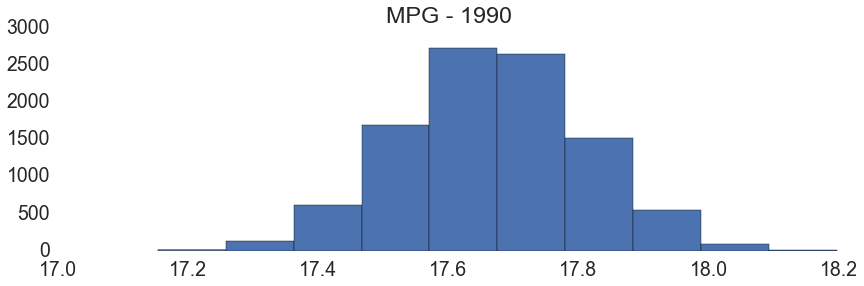

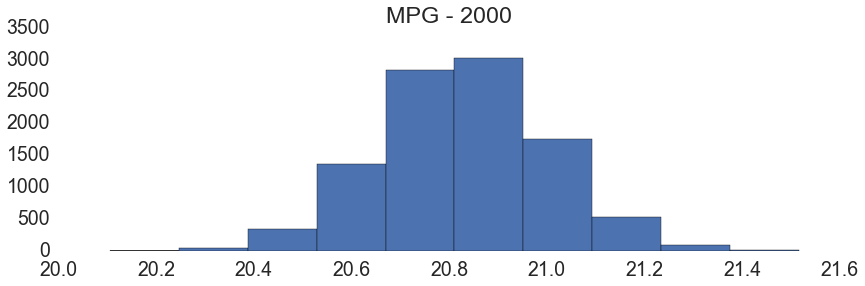

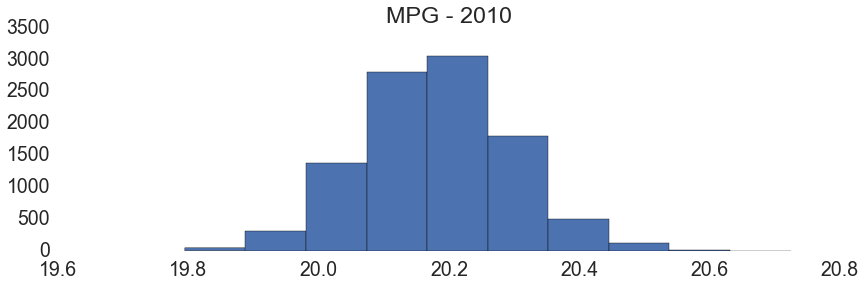

In [67]:
plt.figure(figsize=(14, 4)) #Dimensions of the histogram
plt.subplot(1, 1, 1)
plt.hist(results1990[:,0]) #Plots the histogram
plt.title('MPG - 1990') #Title of histogram
plt.show() 

plt.figure(figsize=(14, 4))
plt.subplot(1, 1, 1)
plt.hist(results2000[:,0])
plt.title('MPG - 2000')
plt.show()

plt.figure(figsize=(14, 4))
plt.subplot(1, 1, 1)
plt.hist(results2010[:,0])
plt.title('MPG - 2010')
plt.show()

**Analysis**

Observation: The data is normally distributed, as predicted.

* In the year 1990, average fuel mileage of cars with a 5% confidence level was $17.7 \pm{0.28}$ miles per gallon.

* In the year 2000, average fuel mileage of cars with a 5% confidence level was $20.8 \pm{0.33}$ miles per gallon.

* In the year 2010, avarage fuel mileage of cars with a 5% confidence level was $20.2 \pm{0.22}$ miles per gallon.

It is interesting to note how between 1990 and 2000 there was a relatively large increase in fuel efficiency of nearly 3 miles per gallon. Between 2000 and 2010, however, fuel efficiency was pretty much stagnant, with the data actually showing a decrease of 0.6 miles per gallon. These trends could be the result of greater innnovation during the 1990s than 2000s, possibly due to increased government restrictions regarding emissions as the threat of global warming became mainstream knowledge. 

***

Overall Analysis of Annual Fuel Cost Data
====

Note: Annual fuel cost is based on 15,000 miles, 55% city driving, and the price of fuel which is provided by the Energy Information Administration and is updated weekly.

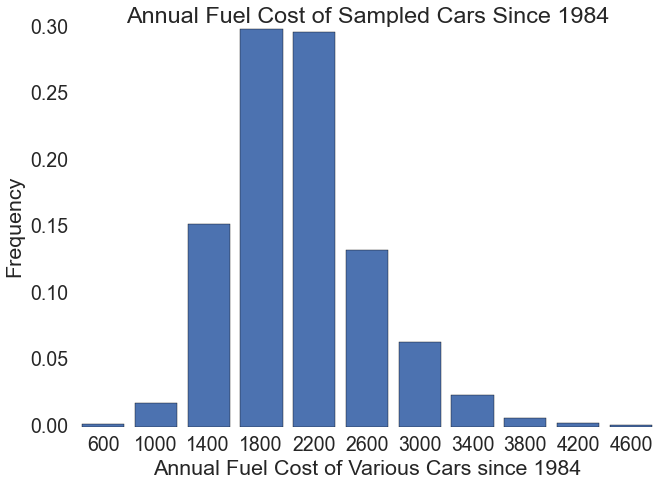

In [21]:
my_bins = np.arange(400,5000,400)
hist, bins = np.histogram(vehicles.ix[:,5], bins = my_bins)
bin_mids = (bins[1:] + bins[:-1]) / 2 
seaborn.barplot(bin_mids, hist / float(len(vehicles.ix[:,5]))) 
plt.xlabel('Annual Fuel Cost of Various Cars since 1984') 
plt.ylabel('Frequency')
plt.title('Annual Fuel Cost of Sampled Cars Since 1984')
seaborn.set_context('talk',font_scale = 1.5)
plt.show() 

In [87]:
print 'The sample mean for annual fuel cost since 1984 is ${:.0f}.'.format(np.mean(vehicles.ix[:,5]))

The sample mean for annual fuel cost since 1984 is $2058.


In [85]:
print 'The sample standard deviaton is ${:.0f}.' .format(math.sqrt(np.var(vehicles.ix[:,5], ddof = 1)))

The sample standard deviaton is $535.


From the histogram it can be seen that the annual fuel cost data is normally distributed, with a slight positive skew (to the right). This again will be using to know when defining functions to be resampled.

***

Using Maximum Likelihood Estimation, Bootstrap Resampling, and Confidence Intervals to Examine Changes in Annual Fuel Cost Between 1990 and 2010
====

The same methods and log-likelihood function will be used to analyze fuel cost that were used to analyze fuel mileage.

**Annual Fuel Cost in 1990:**

In [22]:
def cost_ll_1990(mu, sigma, data): #Defines a function using a normal distribution
    ll = -len(data) / 2. * np.log(2 * math.pi * sigma**2) - np.sum( (data - mu)**2 / (2 * sigma**2) )
    return ll

N = 10000 #Numbers of times the data will be resampled
cost1990 = np.empty( (N, 2) )
for i in range(N): #For loop used to actually do the sampling
    sample_data = np.random.choice(vehicles.ix[8406:9483,5], size=len(vehicles.ix[8406:9483,5]), replace=True) #Creates a synthetic data set
    result = scipy.optimize.minimize(lambda x: -cost_ll_1990(x[0], x[1], sample_data), x0=[2000.,500.], bounds = [(0.001, 6000.),(0.001,1000.)]) #Minimizes the function
    cost1990[i, :] = result.x #Appends the list with the synthetic data that has been minimized with respect to the function

range_cost_1990 = np.percentile(cost1990[:,0], [2.5, 97.5]) #Calculates a 95% confidence interval using percentiling 
mean_cost_1990 = (range_cost_1990[0] + range_cost_1990[1]) / 2
interval_cost_1990 = range_cost_1990[1] - mean_cost_1990
print 'With a 95% confidence interval, the annual fuel cost in 1990:',mean_cost_1990,'dollars plus or minus',interval_cost_1990,'dollars.'

With a 95% confidence interval, the annual fuel cost in 1990: 2241.39208076 dollars plus or minus 33.1450679901 dollars.


**Annual Fuel Cost in 2000:**

In [23]:
def cost_ll_2000(mu, sigma, data):
    ll = -len(data) / 2. * np.log(2 * math.pi * sigma**2) - np.sum( (data - mu)**2 / (2 * sigma**2) )
    return ll

N = 10000 
cost2000 = np.empty( (N, 2) )
for i in range(N):
    sample_data = np.random.choice(vehicles.ix[17978:18817,5], size=len(vehicles.ix[17978:18817,5]), replace=True)
    result = scipy.optimize.minimize(lambda x: -cost_ll_2000(x[0], x[1], sample_data), x0=[2000.,500.], bounds = [(0.001,6000.),(0.001,1000.)])
    cost2000[i, :] = result.x

range_cost_2000 = np.percentile(cost2000[:,0], [2.5, 97.5])
mean_cost_2000 = (range_cost_2000[0] + range_cost_2000[1]) / 2
interval_cost_2000 = range_cost_2000[1] - mean_cost_2000
print 'With a 95% confidence interval, the annual fuel cost in 2000:',mean_cost_2000,'dollars plus or minus',interval_cost_2000,'dollars.'

With a 95% confidence interval, the annual fuel cost in 2000: 1949.66588077 dollars plus or minus 29.8575998259 dollars.


**Annual Fuel Cost in 2010:**

In [24]:
def cost_ll_2010(mu, sigma, data):
    ll = -len(data) / 2. * np.log(2 * math.pi * sigma**2) - np.sum( (data - mu)**2 / (2 * sigma**2) )
    return ll

N = 10000 
cost2010 = np.empty( (N, 2) )
for i in range(N):
    sample_data = np.random.choice(vehicles.ix[28637:29745,5], size=len(vehicles.ix[28637:29745,5]), replace=True)
    result = scipy.optimize.minimize(lambda x: -cost_ll_2010(x[0], x[1], sample_data), x0=[2000.,500.], bounds = [(0.001, 6000.),(0.001,1000.)])
    cost2010[i, :] = result.x

range_cost_2010 = np.percentile(cost2010[:,0], [2.5, 97.5])
mean_cost_2010 = (range_cost_2010[0] + range_cost_2010[1]) / 2
interval_cost_2010 = range_cost_2010[1] - mean_cost_2010
print 'With a 95% confidence interval, the annual fuel cost in 2010:',mean_cost_2010,'plus or minus',interval_cost_2010

With a 95% confidence interval, the annual fuel cost in 2010: 2086.55654751 plus or minus 23.4512204235


Again let's view the results in histogram form:

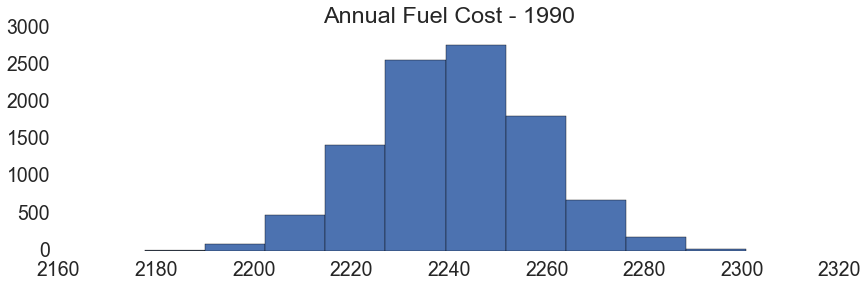

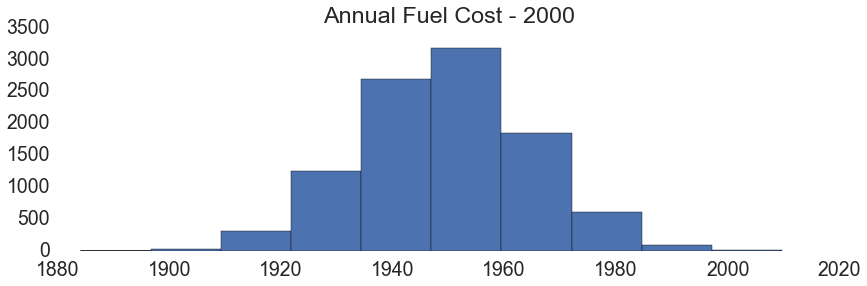

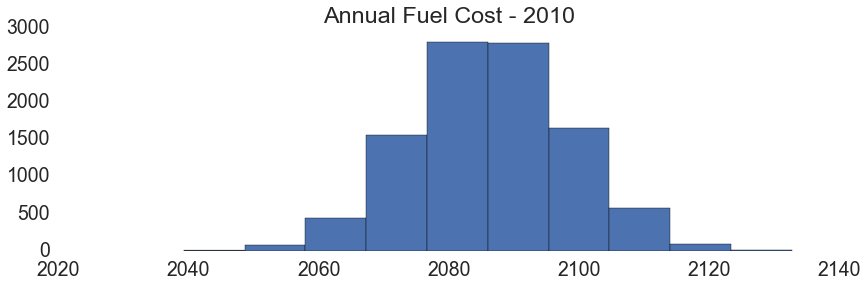

In [25]:
plt.figure(figsize=(14, 4)) #Dimensions of the histogram
plt.subplot(1, 1, 1)
plt.hist(cost1990[:,0]) #Plots the histogram
plt.title('Annual Fuel Cost - 1990') #Title of histogram
plt.show() 

plt.figure(figsize=(14, 4))
plt.subplot(1, 1, 1)
plt.hist(cost2000[:,0])
plt.title('Annual Fuel Cost - 2000')
plt.show()

plt.figure(figsize=(14, 4))
plt.subplot(1, 1, 1)
plt.hist(cost2010[:,0])
plt.title('Annual Fuel Cost - 2010')
plt.show()

**Analysis**

Observation: The data is normally distributed, as predicted.

* In the year 1990, annual fuel cost with a 5% confidence level was $2241 \pm{33}$ dollars.

* In the year 2000, annual fuel cost with a 5% confidence level was $1950 \pm{30}$ dollars.

* In the year 2010, annual fuel cost with a 5% confidence level was $2087 \pm{23}$ dollars.

It is interesting to note how annual fuel cost decreased nearly 300 dollars between 1990 and 2000, then increased a little over 100 dollars between 2000 and 2010. These are obviously point values calculated in the single years, rather than a continuum over the decade, yet they still give a pretty good idea of what was going on with fuel prices at that time. In the 1990s oil prices were relatively low, which explains the decrease in fuel prices. During the 2000's however, oil prices rose and therefore so did the price of fuel.

***
Analysis of the Correlation Between Average Fuel Mileage and Annual Fuel Cost
====

Now that fuel cost and fuel mileage have been examined seperately, the next step is to analyze their relationship. This will be done using a hypothesis test, plot of the data, and finally a regression using the sum of least squares method to find an equation relating the variables.

##Hypotheis Test - Spearman's Correlation Test

Before doing any analysis on the relationship between fuel mileage and fuel cost, it would be wise to first make sure a correlation even exists. This is done using Spearman's Correlation hypothesis test. 

**Null Hypothesis**: Average Fuel Mileage and Annual Fuel Cost are Uncorrelated.

**Alpha = 0.05**

In [72]:
x = scipy.stats.spearmanr(vehicles.ix[:10,4], vehicles.ix[:10,5]) 
print 'p-value = {}, REJECT NULL HYPOTHESIS.' .format(x[1])

p-value = 9.60175158411e-12, REJECT NULL HYPOTHESIS.


With a p-value of $10^{-12}$, there almost certainly exists a correlation between the variables, and therefore a further examination of this relationship is logical.

##Examining the Relationship between Fuel Mileage and Annual Fuel Cost

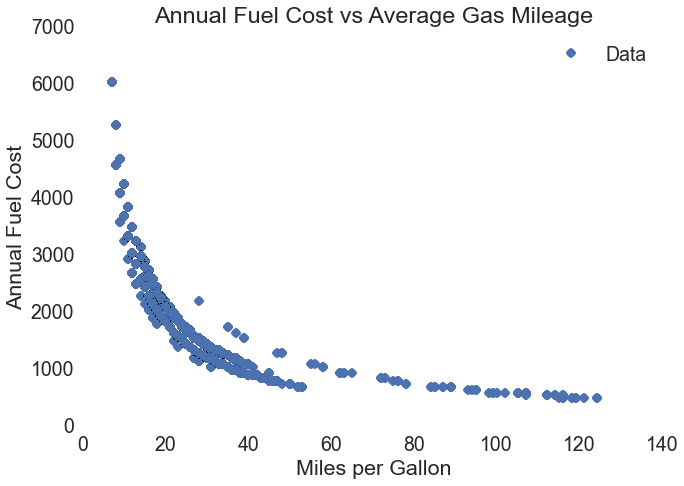

In [33]:
plt.plot(vehicles.ix[:,4],vehicles.ix[:,5], 'o', label='Data') #Plots the data
plt.title('Annual Fuel Cost vs Average Gas Mileage') #Title of the Graph
plt.xlabel('Miles per Gallon') #x-axis label
plt.ylabel('Annual Fuel Cost') #y-axis label
plt.legend(loc='upper right') #Places legend in upper right
seaborn.set_context('talk',font_scale = 1.5) #Formats the plot
plt.show() #Displays the graph

**Observation:** The data is exponentially distributed. Therefore our best guess for the equation of the regression will be an exponential equation of the form: 

$$y=ae^{-bx}$$

where a is the intercept and b is the slope.

###Non-Linear Regression:

In [91]:
def obj(beta): #Objective function takes one argument
    a = beta[0]
    b = beta[1]
    yhat = a * np.exp(-b * vehicles.ix[:,4]) #y-hat is the best guess for the equation of the best-fit line
    resids = yhat - vehicles.ix[:,5] #calculates the residuals
    SSR = np.sum(resids**2) #sum of the squared residuals
    return SSR

result = scipy.optimize.basinhopping(obj, x0=[7000.,0.01]) #minimizes the objective function using Basinhopping
print result

a_opt = result.x[0]
b_opt = result.x[1]

                  nfev: 5944
 minimization_failures: 101
                   fun: 3891980237.4515514
                     x: array([  6.99917458e+03,   7.22461544e-02])
               message: ['requested number of basinhopping iterations completed successfully']
                  njev: 1183
                   nit: 100


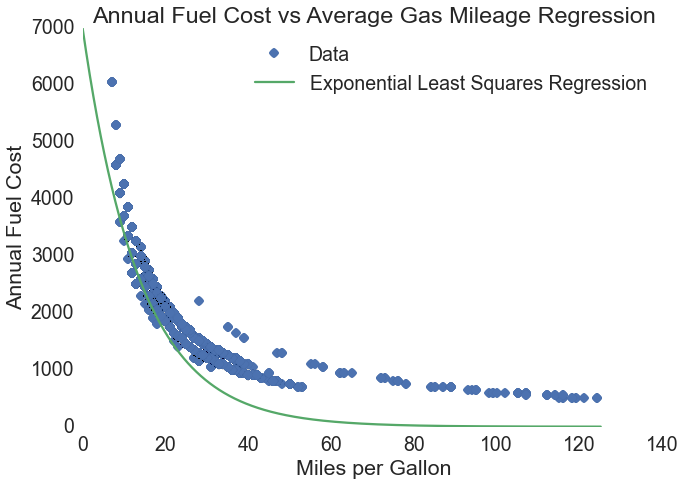

In [94]:
ordered_x_values = np.linspace(0.001,125,35802) #creates a synthetic data set for the x-values because the original data is not in order
plt.plot(vehicles.ix[:,4],vehicles.ix[:,5], 'o', label='Data') #Plots the data
plt.plot(ordered_x_values, a_opt * np.exp(-b_opt * ordered_x_values), '-', label='Exponential Least Squares Regression') #Plots the Regression line
plt.xlabel('Miles per Gallon') #x-axis label
plt.ylabel('Annual Fuel Cost') #y-axis label
plt.legend(loc='upper right')
plt.title('Annual Fuel Cost vs Average Gas Mileage Regression')
seaborn.set_context('talk',font_scale = 1.5)
plt.show()

###Determining the Goodness of Fit:

In [101]:
resids = vehicles.ix[:,5] - a_opt * np.exp(-vehicles.ix[:,4] * b_opt) #the noise in the data
SSR = np.sum(resids**2) #sum of squared residuals
TSS = np.sum( (np.mean(vehicles.ix[:,5]) - vehicles.ix[:,5])**2)
R2 = 1 - SSR / TSS #goodness of fit 

print 'The goodness of fit = ',R2,'which is not great but will provide an adequete estimate for annual fuel cost.'

The goodness of fit =  0.620806794172 which is not great but will provide an adequete estimate for annual fuel cost.


###The Equation Relating Fuel Mileage and Annual Fuel Cost:

$$Annual\space{Fuel}\space{Cost} = 7000e^{-0.07*\space{MPG}}$$

###Checking the Equation for Accuracy:

Using a 2002 BMW 325i as the test car:

In [120]:
#Estimated Annual Fuel Cost
bmw_mpg = 20 #this value was taken from the dataset 
estimated_annual_fuel_cost = 7000*np.exp(-0.07*bmw_mpg)
actual_annual_fuel_cost = 2100 #This value was taken from the dataset
print 'The estimated annual fuel cost for a 2002 BMW 325i is ${:.0f}.' .format(estimated_annual_fuel_cost)
print 'The actual annual fuel cost for a 2002 BMW 325i is ${:.0f}.' .format(actual_annual_fuel_cost)
print 'The percent error in the estimation is {:.1%}.' .format((actual_annual_fuel_cost - estimated_annual_fuel_cost) / actual_annual_fuel_cost)

The estimated annual fuel cost for a 2002 BMW 325i is $1726.
The actual annual fuel cost for a 2002 BMW 325i is $2100.
The percent error in the estimation is 17.8%.


####Analysis

A plot of annual fuel cost vs. average fuel mileage shows that the variables have an exponential relationship. A sum of squared residuals non-linear regreesion was then constructed to fit a line to the data. The goodness of fit of this best-fit line was calculated to be 0.62. The equation was then tested using a test car with a known average fuel mileage and annual fuel cost. The percent error of the model equation was calcualted to be about 18%. These results show that the non-linear regression is certainly not completely accurate, but does give a ball-park estimate of annual fuel cost given an average fuel mileage.

***

Conclusion
====

Average fuel mileage and annual fuel cost data for various automobiles since 1984 was collected from a government database. The data was plotted using a histogram to determine the type of distribution. It was determined that both variables followed a normal distribution. From there, maximum likelihood estimation and bootstrap resampling were used to calculate a confidence interval for the mean fuel mileage and annual fuel cost in the years 1990, 2000, and 2010. Trends in the mean showed that between 1990 and 2000 fuel mileage increased by nearly 3 MPG, while annual fuel cost decreased nearly 300 dollars. Between 2000 and 2010 average fuel milege remained fairly stagnant, while annual fuel cost increased by a little more than 100 dollars. An exponential regression was then done to examine the correlation between fuel mileage and annual fuel cost. A best-fit line was plotted and the equation of the line was tested using a car from the database. A percent error calculation showed that the derived equation was accurate within 18%. 

***

##Bibliography

http://catalog.data.gov/dataset/fuel-economy-data 